### 랜덤포레스트
- 랜덤한 결정 트리(Dexision Tree)를 여러개 묶은 모델
- 트리 < 데이터(부트스트랩(중복이 될 수 있음))

In [1]:
#119 
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()

In [3]:
cancer.target_names # 2진 분류하는 데이터

array(['malignant', 'benign'], dtype='<U9')

In [4]:
#결정 트리 VS 랜덤 포레스트

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [7]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [11]:
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators=100).fit(X_train,y_train)

In [12]:
dt.score(X_test, y_test), rf.score(X_test,y_test)

(0.9090909090909091, 0.9790209790209791)

In [16]:
import matplotlib.pylab as plt

In [13]:
dt.feature_importances_

array([0.        , 0.0096886 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.69955965, 0.        , 0.        ,
       0.        , 0.        , 0.01948008, 0.01676117, 0.017502  ,
       0.01204155, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.06706044, 0.        , 0.11373562, 0.        ,
       0.00975173, 0.03441914, 0.        , 0.        , 0.        ])

In [14]:
rf.feature_importances_

array([0.03958219, 0.01052967, 0.0484782 , 0.04383059, 0.00590569,
       0.01059084, 0.05263096, 0.12872075, 0.00433775, 0.00274758,
       0.02180689, 0.00628296, 0.01195733, 0.02460919, 0.00521399,
       0.00404167, 0.00505216, 0.00373227, 0.00623066, 0.00683597,
       0.08226579, 0.01950284, 0.11778158, 0.11340796, 0.01373767,
       0.0339329 , 0.0347013 , 0.12011733, 0.01281495, 0.00862037])

<BarContainer object of 30 artists>

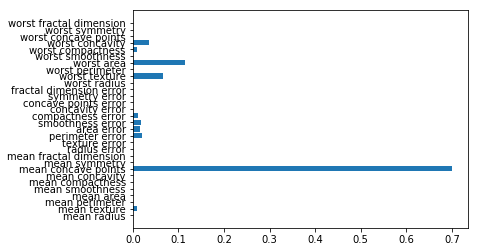

In [17]:
plt.barh(cancer.feature_names, dt.feature_importances_)

<BarContainer object of 30 artists>

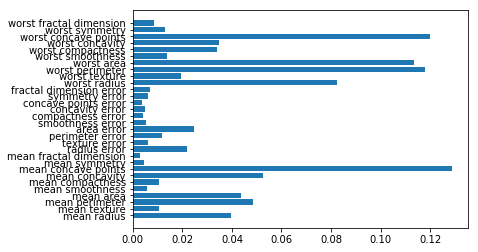

In [18]:
plt.barh(cancer.feature_names, rf.feature_importances_)

## 그라이언트 부스팅 회귀트리
- 트리 앙상블
- 랜덤포레스트 : 여러 나무를 서로 다른 데이터로 독립적으로 학습(병렬 가능)
- Gradient boosting decision tree : 나무 하나씩 순차적으로 학습, 전 나무의 오류를 최소화하는 방향으로 학습
  - 작은 나무 1-5개
    - 나무가 작다(max-depth 가 작고, leaf가 적다) - 약한 학습기(weak learner)
    - 파라미터 설정에 민감하다.


In [19]:
#p122 보통 안정적인 랜덤포레스트 먼저 사용, 더 성능을 높이고 싶을때 Gboost 사용

from sklearn.ensemble import GradientBoostingClassifier



In [20]:
gbc = GradientBoostingClassifier(random_state=0).fit(X_train,y_train)

In [23]:
gbc.score(X_train,y_train), gbc.score(X_test, y_test)
#과적합 > 트리를 작게 만들자 > 사전/사후 가지치기

(1.0, 0.958041958041958)

In [26]:
gbc = GradientBoostingClassifier(random_state=0, max_depth=2).fit(X_train,y_train)
gbc.score(X_train,y_train), gbc.score(X_test,y_test)#max_depth 모델의 복잡도를 높고 낮추는 것

(1.0, 0.972027972027972)

<BarContainer object of 30 artists>

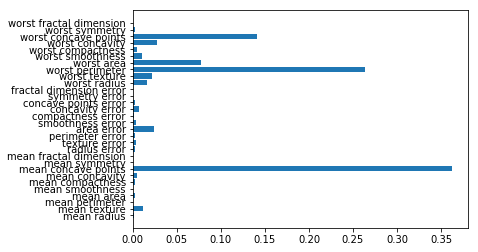

In [27]:
plt.barh(cancer.feature_names, gbc.feature_importances_)

# p 131 에이다부스트(AdaBoost) : Adaptive Boosting
- 그라디언트 부스트 트리와 비슷.
- 차이 : 이전 트리의 오차를 최소화, 이전 트리의 오차 샘플에 가중치를 높여서 다음트리에서 학습

In [29]:
#132
from sklearn.ensemble import AdaBoostClassifier


In [30]:
adc = AdaBoostClassifier(random_state=0).fit(X_train, y_train)
adc.score(X_train,y_train), adc.score(X_test, y_test)

(1.0, 0.9790209790209791)

<BarContainer object of 30 artists>

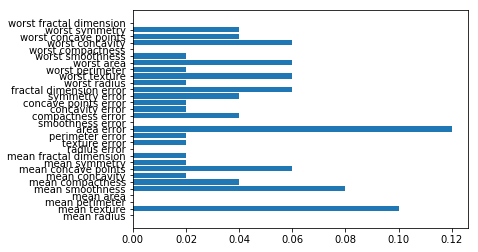

In [31]:
#특성 중요도
plt.barh(cancer.feature_names, adc.feature_importances_)

- 결정 트리 > 과적합 > 앙상블(랜덤 포레스트,그라디언트 부스팅 OR 에이다부스트)
- 최종 결정  :분류 작업일 경우는 투표(다수결), 예측일 때는 평균

 - 134 SVM(Support vector machine)
 - 139 학습 : *일부 데이터 포인트(샘플)가 클래스 사이의 결정경계를 구분하는데 얼마나 중요한지를 배운다.\
 

In [33]:
from sklearn.svm import SVC, SVR #SVM-C 분류용, SVM-R 회귀용
import mglearn

C:\Users\wtime\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\wtime\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


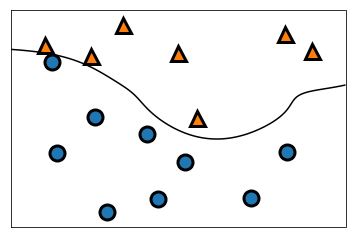

In [57]:
#140
gamma =1#하나의 샘플이 미치는 영향의범위, 작으면 넓은 범위
c = 10 # 규제 regularization : 파라미터가 값이 작아지도록 규제
X,y =mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=c, gamma=gamma).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps=0.5)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0],sv[:,1], sv_labels, s =15,markeredgewidth=3)

In [60]:
sv = SVC(gamma='auto').fit(X_train, y_train)
sv.score(X_train,y_train), sv.score(X_test,y_test)
#값을 정규화하면 95%까지 상승, C 를 올리면 97%

(1.0, 0.6293706293706294)

### 신경망(neural network) : 다층 퍼셉트론


In [69]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)/Graphviz2.38/bin/'



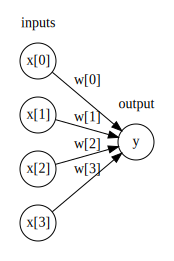

In [71]:
#Logistic_regression
display(mglearn.plots.plot_logistic_regression_graph())

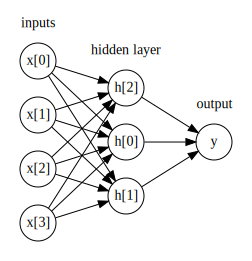

In [72]:
#신경망
display(mglearn.plots.plot_single_hidden_layer_graph())

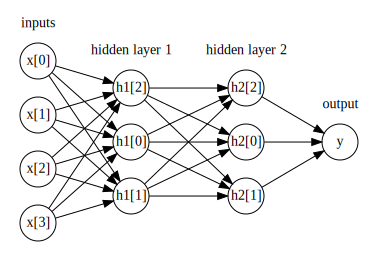

In [73]:
mglearn.plots.plot_two_hidden_layer_graph()
#히든레이어가 없으면 linea/logistic regression
#히든레이어가 1~3면 신경망(MLP)
#히든레이어가 10~100~1000 많아진모델을 딥뉴럴 네트워크라고 합니다. 

In [74]:
#151
from sklearn.neural_network import MLPClassifier, MLPRegressor
mlp = MLPClassifier().fit(X_train,y_train)
mlp.score(X_train,y_train), mlp.score(X_test,y_test) # 과소적합, under fitting

C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(0.9131455399061033, 0.8881118881118881)

In [79]:
#(3,3) 히든레이어2개에 각각 노드 3개씩
mlp =MLPClassifier(hidden_layer_sizes=(100,50,50,50)).fit(X_train, y_train)
mlp.score(X_train,y_train), mlp.score(X_test,y_test) # 과소적합, under fitting
#장점 : 모델 형태를 내 마음대로 설계, 성능은 good 형태가 최적일때
#단점 : 어떤 형태가 최선인지 모름, 학습 속도가 느리고, 분석이 까다롭다. 

(0.9225352112676056, 0.9020979020979021)

- KNN(예측/분류), Linear Regression(예측), Logistic Regression(분류)
- Decision Tree(예측/분류), Random Forest, Gradient Boost Decision Tree, ADaBoot, SVN(SVM-C분류용, SVM-R 예측용), MLP(뉴럴네트워크)
